## Getting ready

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## How to do it...

In [16]:
batch_size = 20

In [17]:
def my_output(X, weights, biases):
    return tf.add(tf.multiply(X, weights), biases)

In [18]:
my_opt = tf.optimizers.SGD(learning_rate=0.02)

In [19]:
np.random.seed(0)
x_vals = np.random.normal(1, 0.1, 100).astype(np.float32)
y_vals = (x_vals * (np.random.normal(1, 0.05, 100) - 0.5)).astype(np.float32)

def loss_func(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf.random.set_seed(1)
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
history_batch = list()

for i in range(50):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)
    history_batch.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i + 1) % 25 == 0:
        print(f'Step # {i + 1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 25 Weights: [-0.5585294] Biases: [0.9265154]
Loss = 0.03692679852247238
Step # 50 Weights: [-0.48540017] Biases: [0.98823684]
Loss = 0.016214298084378242


In [20]:
np.random.seed(0)
x_vals = np.random.normal(1, 0.1, 100).astype(np.float32)
y_vals = (x_vals * (np.random.normal(1, 0.05, 100) - 0.5)).astype(np.float32)

def loss_func(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf.random.set_seed(1)
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
history_stochastic = list()

for i in range(50):
    rand_index = np.random.choice(100, size=1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)
    history_stochastic.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if (i + 1) % 25 == 0:
        print(f'Step # {i + 1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 25 Weights: [-0.55922425] Biases: [0.94199556]
Loss = 0.0006058551953174174
Step # 50 Weights: [-0.48995683] Biases: [0.9932217]
Loss = 0.07173044234514236


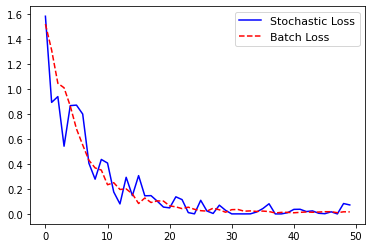

In [21]:
plt.plot(history_stochastic, 'b-', label='Stochastic Loss')
plt.plot(history_batch, 'r--', label='Batch Loss')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()